In [0]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn')
%matplotlib inline

# use !pwd to find current working directory
from google.colab import drive # mount drive to access data
drive.mount('/content/gdrive')

In [3]:
# set working directory to data folder (or wherever we keep the data)
# %cd /
%cd gdrive/My Drive/Colab Notebooks/data
!ls

/content/gdrive/My Drive/Colab Notebooks/data
age_at_mar.csv	diamonds.csv  gifted.csv  top30.xlsx


In [0]:
#@title
def draw2Normal(xbar, mu0, s, n, alpha=0.05, tails=""):
    
    plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(1,2)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])

    limit = 3.5
    # figure 1: The real distribution
    SE = s/np.sqrt(n)
    minX  = mu0-limit*SE
    maxX  = mu0+limit*SE
    x     = np.linspace(minX,maxX,1000)
    y     = ss.norm.pdf(x,loc=mu0,scale=SE)
    
    ax1.plot(x,y)
    
    

    hh    = ss.norm.pdf(mu0, loc=mu0, scale=SE)
    xStar = []
    zStar = []
    dd = 1
    if tails == "1-left":
        zStar.append(ss.norm.ppf(alpha))
        zStar.append(limit)
        dd = -1
    elif tails == "1-right":
        zStar.append(-limit)
        zStar.append(ss.norm.ppf(1-alpha))
        dd = 1
    elif tails == "2":
        zStar.append(ss.norm.ppf(alpha/2))
        zStar.append(ss.norm.ppf(1-alpha/2))
    
                
    for i in range(len(zStar)):
        xStar.append(mu0 + zStar[i]*SE)
        if abs(zStar[i]) == limit:
            continue
        ax1.vlines(xStar[i], 0, ss.norm.pdf(mu0,loc=mu0,scale=SE), color="red", alpha=0.8)
        if i == 0:
            px = x[[x < xStar[i]]]
        else:
            px = x[[x > xStar[i]]]
            
                    
        ax1.fill_between(
                px,
                ss.norm.pdf(px,mu0,SE),
                color="red",
                alpha=0.4,
                linewidth=1)
                   
    ax1.plot(xbar,0.0,'o',alpha=0.8)
    msg = r"$\bar{x}=$" + str(np.round(xbar,2))
    ax1.annotate(msg, xy=(xbar, -0.01), xytext=(xbar, -hh/5), 
             arrowprops=dict(arrowstyle="->", color="black",connectionstyle="angle3"),
             size=12)
    if xbar < mu0:
        dd = 1
    else:
        dd = -1

    
    for i in range(len(xStar)):
        if xStar[i] == minX or xStar[i] == maxX:
            continue
            
        y_coord_alpha = ss.norm.pdf(xStar[i],loc=mu0,scale=SE)
        if tails == "2":
            msg = r"$\alpha/2$"
        else:
            msg = r"$\alpha$" 
        dd = (-1)**(i+1)
        ax1.annotate(msg, xy=(xStar[i]+dd*0.5*SE, 0.1), xytext=(xStar[i],y_coord_alpha), size=15)
        msg = r"$x^*=$" + str(np.round(xStar[i],2))
        ax1.annotate(msg, xy=(xStar[i]-dd*0.05*SE, 0.0), xytext=(xStar[i]-dd*1.1*SE, hh/5), 
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="black"),
                     size=12)
        ax1.plot(xStar[i],0.0,'ro',alpha=0.7)



    


    ax1.set_title("Real Distribution")
    
     # figure 2: The standard normal distribution
    minX = -limit
    maxX = +limit
    x=np.linspace(minX,maxX,1000)
    y=ss.norm.pdf(x,loc=0,scale=1)
    
    zStar = []
    dd = 1
    if tails == "1-left":
        zStar.append(ss.norm.ppf(alpha))
        zStar.append(limit)
    elif tails == "1-right":
        zStar.append(-limit)
        zStar.append(ss.norm.ppf(1-alpha))
    elif tails == "2":
        zStar.append(ss.norm.ppf(alpha/2))
        zStar.append(ss.norm.ppf(1-alpha/2))

    zVal = (xbar-mu0)/SE
    
    for i in range(len(zStar)):
    
        if abs(zStar[i]) == limit:
            continue
        ax2.vlines(zStar[i], 0, ss.norm.pdf(mu0,loc=0,scale=1), color="red", alpha=0.8)
        if i == 0:
            px = x[[x < zStar[i]]]
        else:
            px = x[[x > zStar[i]]]

        ax2.fill_between(
                px,
                ss.norm.pdf(px,0,1),
                color="red",
                alpha=0.4,
                linewidth=1)
        
        msg = r"$z^*=$" + str(np.round(zStar[i],2))
        dd = (-1)**(i+1)
        ax2.annotate(msg, xy=(zStar[i]+dd*0.05, 0.0), xytext=(zStar[i]+dd*1.25, 0.05), 
                 arrowprops=dict(arrowstyle="->", color="black",connectionstyle="arc3"),
                 size=12)


        y_coord_alpha = ss.norm.pdf(zStar[i])
        if tails == "2":
            msg = r"$\alpha/2$"
        else:
            msg = r"$\alpha$" 
        dd = (-1)**(i+1)
        ax2.annotate(msg, xy=(zStar[i]+dd*0.5*SE, 0.1), xytext=(zStar[i], y_coord_alpha), size=15)        
        ax2.plot(zStar[i],0.0,'ro',alpha=0.7)

    ax2.plot(x,y)
    
    ax2.set_title("Standard Normal Distribution")


>[StatsModels: Python Functions for One-sample Tests](#scrollTo=_d8UFZabvkqT)

>>[Example](#scrollTo=xxAOUKnzwviu)

>[Identify Hypotheses](#scrollTo=8ZNUofs5IgJL)

>[IQ Score of Mothers of Gifted Children](#scrollTo=Zfu_de6fJ5wz)

>[IQ Score of Mothers of Gifted Children - Part 2](#scrollTo=lpP5O9T5jgU2)

>[Testing for Fibromyalgia](#scrollTo=JMs-U9ZJrToj)

>[Happy Hours](#scrollTo=nnHiCCzVtHJd)

>[Sleep Habits of New Yorkers](#scrollTo=5j6uFnZVytSe)

>[True or false](#scrollTo=PJ8wt1Lk20p2)

>[Waiting at the ER](#scrollTo=7ELSCTjg4fou)

>>[Advanced : Power and Sample Size with StatsModels](#scrollTo=l389f2uwkZbN)

>[Browsing on the Mobile Device](#scrollTo=Fdna7Lwm-2hQ)

>[Taste Test](#scrollTo=cbBg4KoWCMum)

>[Working Backwards](#scrollTo=sHTdo4qUGtxC)

>[Age at First Marriage](#scrollTo=8nBYv7qUKwIj)



# <font color="slateblue">StatsModels: Python Functions for One-sample Tests</font>

The `statsmodels` library contains a number of statistical tests and tools. It is based on `scipy.stats` (and we could actually run all the tests using `scipy.stats`) but it is more intuitive in the way in which the data is managed. Please, have a look at [http://www.statsmodels.org/stable/stats.html](http://www.statsmodels.org/stable/stats.html) for a broad description of the library.

**NOTE**: These statistical functions in general can only be used to compute tests with **raw data**, i.e., when the entire dataset is provided. If summary data, i.e., $\bar{x}, s, n$ are given, you will have to perform the test using the formulae.

To import the library, use:

```python
import statsmodels.stats.weightstats as smw
```

The function we can use to perform one-sample tests is:
- `DescrStatsW()`: To get sample statistics, as well as z-tests (large samples), t-tests (small samples), and confidence intervals. It can also be used to compute the power of a test and the sample size.

## <font color="indianred">Example</t>

Generate a random sample of $n=50$ observations under a normal distribution with mean $\mu=75k$ and standard deviation $\sigma=10k$. Generate a histogram to visualize the data distribution and compute some summary statistics. Then, test whether the population mean is above $76k$, using $\alpha=0.05$. Use the function `ss.test_1samp()`.

In [0]:
x = ss.norm.rvs(loc=75,scale=15,size=50)

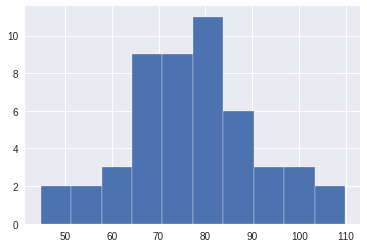

In [162]:
# create histogram
plt.hist(x, edgecolor="white", bins=10)
plt.show()

In [175]:
import statsmodels.stats.weightstats as smw

alpha = 0.05
#res   = ssw.DescrStatsW(x, np.ones(50)*51./50) # store results in an object (note correction for df -> SE=s/sqrt(n-1))
res   = ssw.DescrStatsW(x) # store results in an object (note correction for df -> SE=s/sqrt(n-1))
# dir(res) # have a look at the attributes
tStat, pVal = res.ztest_mean(value=75, alternative='two-sided')

# print some output
print("One-sample Test with statsmodels.stats ::")
print("-"*41)
print("xbar    \t = {0:6.3f}".format(res.mean) )
print("s       \t = {0:6.3f}".format(res.std) )
print("SE       \t = {0:6.3f}".format(res.std_mean) )
print("Test stat t \t = {0:6.3f}".format(tStat) )
print("p-value  \t = {0:6.3f}".format(pVal) )
if pVal < alpha:
  print("Reject H0")
else:
  print("Fail to reject H0")
print("-"*41)
  
# we can also get the CI
lower, upper = res.zconfint_mean(alpha=0.05, alternative='two-sided')
print("{0:5.2f}% CI : [{1:6.3f}, {2:6.3f}]".format((1-alpha)*100, lower, upper))

# Do we get the same results if we manually compute the test and CI? If not, why? 

One-sample Test with statsmodels.stats ::
-----------------------------------------
xbar    	 = 77.639
s       	 = 13.993
SE       	 =  1.999
Test stat t 	 =  1.320
p-value  	 =  0.187
Fail to reject H0
-----------------------------------------
95.00% CI : [73.721, 81.557]


#  <font color="slateblue">Identify Hypotheses</font>

Write the null and alternative hypotheses in words and then symbols
for each of the following situations. 


1. New York is known as "the city that never sleeps."" A random sample of 25 New Yorkers were asked how much sleep they get per night. Do these data provide convincing evidence that New Yorkers on average sleep less than 8 hours a night? 
2. Employers at a firm are worried about the effect of March Madness, a basketball championship held each spring in the US, on employee productivity. They estimate that on a regular business day employees spend on average 15 minutes of company time checking personal email, making personal phone calls, etc. They also collect data on how much company time employees spend on such non-business activities during March Madness. They want to determine if these data provide convincing evidence that employee productivity decreases during March Madness.


***


- **Q1**: $H_0: \mu = 8$ (On average, New Yorkers sleep 8 hours a night.) $H_A: \mu < 8$ (On average, New Yorkers sleep less than 8 hours a night.) 
- **Q2**: $H_0: \mu = 15$ (The average amount of company time each employee spends not working is 15 minutes for March Madness.) $H_A: \mu > 15$ (The average amount of company time each employee spends not working is greater than 15 minutes for March Madness.) 


# <font color="slateblue">IQ Score of Mothers of Gifted Children</font>

Researchers investigating characteristics of gifted children collected data from schools in a large city on a random sample of thirty-six children who were identified as gifted children soon after they reached the age of four. The following histogram shows the distribution of the ages (in months) at which these children first counted to 10 successfully. Also provided are some sample statistics. 

1. Import the dataset `gifted.csv` and store it into a pandas dataframe.
2. Build a histogram and compute sample statistics for the variable `count`, i.e., the age at which a baby first count to 10 successfully.
3. Are conditions for inference satisfied?
4. Suppose you read on a parenting website that children first count to 10 successfully when they are 32 months old, on average. Perform a hypothesis test to valuate if these data provide convincing evidence that the average age at which gifted children first count to 10 successfully is different than the general average of 32 months. Use a significance level of 0.10.
5. Interpret the p-value in context of the hypothesis test and the data. 
6. Calculate a 90% confidence interval for the average age at which gifted children first count to 10 successfully. 
7. Do your results from the hypothesis test and the confidence interval agree? Explain.
8. Carry out the hypothesis test and recompute the confidence interval using `statsmodels`. Compare the results with those obtained in the previous questions.

In [165]:
# Question 1
df = pd.read_csv("gifted.csv")
df.head()

,score,fatheriq,motheriq,speak,count,read,edutv,cartoons
0,159,115,117,18,26,1.9,3.00,2.00
1,164,117,113,20,37,2.5,1.75,3.25
2,154,115,118,20,32,2.2,2.75,2.50
3,157,113,131,12,24,1.7,2.75,2.25
4,156,110,109,17,34,2.2,2.25,2.50


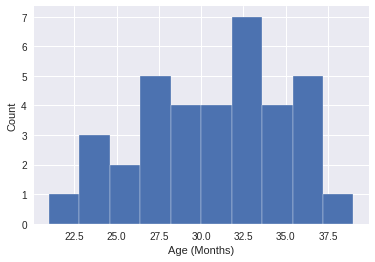

Summary Statistics for Column 'count':
--------------------------------------


count    36.000000
mean     30.694444
std       4.314887
min      21.000000
25%      28.000000
50%      31.000000
75%      34.250000
max      39.000000
Name: count, dtype: float64

In [166]:
# Question 2
plt.hist(df['count'], edgecolor='white', bins=10)
plt.xlabel("Age (Months)")
plt.ylabel("Count")
plt.show()

# Print statistics for column `count`
print("Summary Statistics for Column 'count':")
print("-"*38)
df["count"].describe()

**Question 3**: We check:
- Independence: The data are randomly sampled and 36 children make up less than 10% of all gifted children, so independence holds.
- Sample size: The sample size is large enough (36 > 30).
- Skew: The data are approximately symmetric.

**Question 4**: We set up the following two-tail test:
\begin{equation*}
\begin{cases} 
H_0 : & \mu = 32 \\
H_a : & \mu \neq 32  
\end{cases}
\end{equation*}
We then perform the four steps of hypothesis testing (using $\alpha=0.1$)

**Step 1** : Assume $H_0$ is true, i.e., $\mu_0 = 32$.

In [0]:
mu0 = 32

**Step 2** : Collect sample statistics.

In [168]:
xbar = df['count'].mean()
s    = df['count'].std()
n    = len(df['count'])
SE   = s/np.sqrt(n)

print("xbar \t=", xbar)
print("s \t=", s)
print("n \t=", n)
print("SE \t=", SE)

xbar 	= 30.694444444444443
s 	= 4.314887480370024
n 	= 36
SE 	= 0.7191479133950041


**Step 3**: Compute test statistic and p-value.

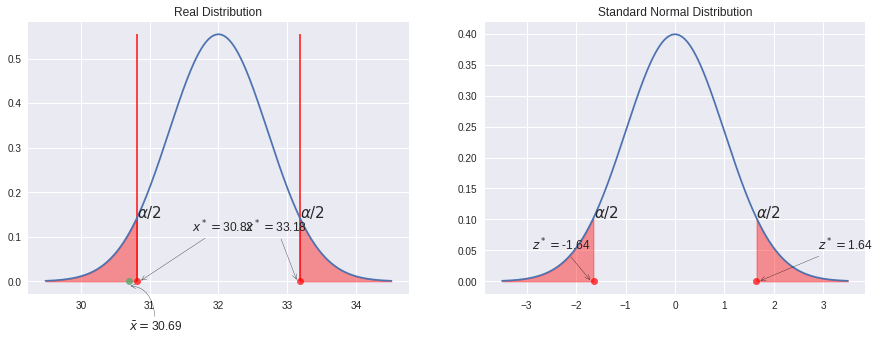

In [141]:
draw2Normal(xbar=xbar, mu0=mu0, s=s, n=n, alpha=0.1, tails="2")

In [169]:
# 3.1 Compute test statistic
zStat = (xbar-mu0)/SE

# 3.2 Get p-value
pVal  = ss.norm.cdf(zStat)*2

print("z       = {0:6.3f}".format(zStat))
print("p-value = {0:6.3f}".format(pVal))

z       = -1.815
p-value =  0.069


**Step 4**: Since the p-value ($0.069$) is below $\alpha=0.1$, we **reject $H_0$**.

**Question 5**: Interpretation of the p-value. Since the p-value is below $\alpha$, we reject $H_0$. That is, there is enough evidence to claim that the averaga age at which gifted children count to 10 successfully is different from the average age of 32 months.

In [170]:
# Question 6 : 90% CI

alpha = 0.1
# get z* for the 90% CI, using 1-alpha/2 (check out `ss.norm?`)
zStar = ss.norm.ppf(1-alpha/2)
lower = xbar - zStar*SE
upper = xbar + zStar*SE
print("xbar  = {0:5.2f}".format(xbar))
print("z*    = {0:5.2f}".format(zStar))
print("lower = {0:5.2f}".format(lower))
print("upper = {0:5.2f}".format(upper))

print("We are {0:2.0f}% confident that the average age at which gifted children count \
to 10 successfully is between {1:5.2f} and {2:5.2f} months.".format((1-alpha)*100, lower,upper))

xbar  = 30.69
z*    =  1.64
lower = 29.51
upper = 31.88
We are 90% confident that the average age at which gifted children count to 10 successfully is between 29.51 and 31.88 months.


**Question 7**: Yes, the two methods are giving consistent answers: The test indicates that the average age of gifted children is different from 32. The CI does not contain 32, as expected. We can actually say that the age at which these gifted children learn to count up to 10 is below 32 months.

In [192]:
# Question 8: Use built-in functions to carry out HT and CI
res=smw.DescrStatsW(df['count'])
lower, upper = res.zconfint_mean(alpha=0.1)  # get CI
zStat, pVal = res.ztest_mean(value=mu0, alternative='two-sided') # and HT

# printing information
msg = "Results of HT and CI with statsmodels ::"
print(msg)
print("-"*len(msg))
print("xbar  \t= {0:6.2f}".format(res.mean,3))
print("s  \t= {0:6.2f}".format(res.std))
print("n  \t= {0:6.2f}".format(res.nobs))
print("SE  \t= {0:6.2f}".format(res.std_mean))

# lower and upper of CI
print("lower  \t= {0:6.2f}".format(lower))
print("upper  \t= {0:6.2f}".format(upper))

# test stat and p-value of HT
print("z\t= {0:6.3f}".format(zStat))
print("p-value\t= {0:6.3f}".format(pVal))

Results of HT and CI with statsmodels ::
----------------------------------------
xbar  	=  30.69
s  	=   4.25
n  	=  36.00
SE  	=   0.72
lower  	=  29.51
upper  	=  31.88
z	= -1.815
p-value	=  0.069


# <font color="slateblue">IQ Score of Mothers of Gifted Children - Part 2</font>

The previous exercise describes a study on gifted children. In this study, along with variables on the children, the researchers also collected data on the mother's and father's IQ of the 36 randomly sampled gifted children. 
1. Provide a histogram and some sample statistics for the distribution of mother's IQ (column `motheriq`.)
2. Perform a hypothesis test to evaluate if these data provide convincing evidence that the average IQ of mothers of gifted children is different than the average IQ for the population at large, which is 100. Use a significance level of 0.10. 
3. Calculate a 90% confidence interval for the average IQ of mothers of gifted children. 
4. Do your results from the hypothesis test and the confidence interval agree? Explain. 
5. Recompute the test and the CI using `statsmodels`.


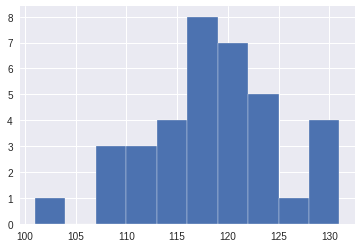

Printing summary statistics for column 'motheriq':
--------------------------------------------------


count     36.000000
mean     118.166667
std        6.504943
min      101.000000
25%      113.750000
50%      118.000000
75%      122.250000
max      131.000000
Name: motheriq, dtype: float64

In [0]:
# Question 1 : Histogram and summary statistics

df['motheriq'].hist(edgecolor="white", bins=10)
plt.show()

print("Printing summary statistics for column 'motheriq':")
print("-"*50)
df['motheriq'].describe()

**Question 2**: We set up the following two-tail test:
\begin{equation*}
\begin{cases} 
H_0 : & \mu = 100 \\
H_a : & \mu \neq 100 
\end{cases}
\end{equation*}
We then perform the four steps of hypothesis testing (using $\alpha=0.1$)

**Step 1** : Assume $H_0$ is true, i.e., $\mu_0 = 100$.

In [0]:
mu0 = 100

**Step 2** : Collect sample statistics.

In [0]:
xbar = df['motheriq'].mean()
s    = df['motheriq'].std()
n    = len(df['motheriq'])
SE   = s/np.sqrt(n)

print("xbar \t=", xbar)
print("s \t=", s)
print("n \t=", n)
print("SE \t=", SE)

xbar 	= 118.16666666666667
s 	= 6.504943175331029
n 	= 36
SE 	= 1.0841571958885048


**Step 3**: Compute test statistic and p-value.

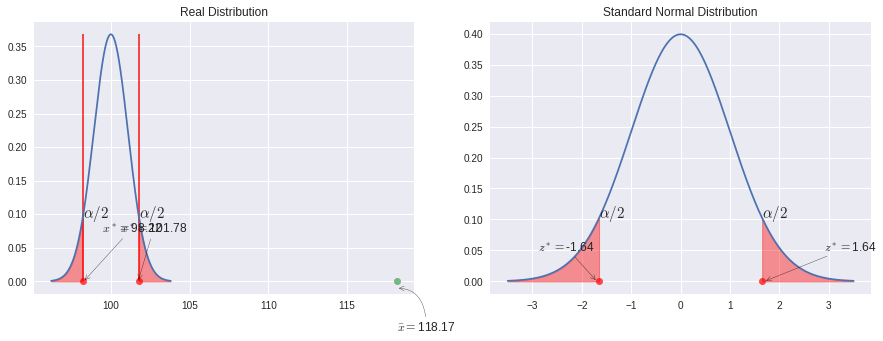

In [0]:
draw2Normal(xbar=xbar, mu0=mu0, s=s, n=n, alpha=0.1, tails="2")

In [0]:
# 3.1 Compute test statistic
zStat = (xbar-mu0)/SE

# 3.2 Get p-value
pVal  = (1-ss.norm.cdf(zStat))*2

print("z       = {0:5.3f}".format(zStat))
print("p-value = {0:5.3f}".format(pVal))

z       = 16.756
p-value = 0.000


**Step 4**: Since the p-value ($\approx 0$) is below $\alpha=0.1$, we **reject $H_0$**. It makes sense: We see that a sample mean of $\bar{x}= 118.16$ is more than 16 standard deviation above the hypothesized mean $\mu_0=100$. We know that it is extremely unlikely to obtain observations 16 standard deviations away from the mean.

In [0]:
# Question 5 : 90% CI

alpha = 0.1
# get z* for the 90% CI, using 1-alpha/2 (check out `ss.norm?`)
zStar = ss.norm.ppf(1-alpha/2)
lower = xbar - zStar*SE
upper = xbar + zStar*SE
print("xbar  = {0:5.2f}".format(xbar))
print("z*    = {0:5.2f}".format(zStar))
print("lower = {0:5.2f}".format(lower))
print("upper = {0:5.2f}".format(upper))

print("We are {0:2.0f}% confident that the IQ of mothers of gifted children \
is between {1:5.2f} and {2:5.2f} months.".format((1-alpha)*100, lower,upper))

xbar  = 118.17
z*    =  1.64
lower = 116.38
upper = 119.95
We are 90% confident that the IQ of mothers of gifted children is between 116.38 and 119.95 months.


**Question 6**: Yes, the two methods are giving consistent answers: The test indicates that the average IQ of mothers of gifted children is different from 100. The CI does not contain 100, as expected. The expected IQ of that group of mothers is above 100, with 90% confidence.

In [195]:
# Question 8: Use built-in functions to carry out HT and CI
res=smw.DescrStatsW(df['motheriq'])
lower, upper = res.zconfint_mean(alpha=0.1)  # get CI
zStat, pVal = res.ztest_mean(value=mu0, alternative='two-sided') # and HT

# printing information
msg = "Results of HT and CI with statsmodels ::"
print(msg)
print("-"*len(msg))
print("xbar  \t= {0:6.2f}".format(res.mean,3))
print("s  \t= {0:6.2f}".format(res.std))
print("n  \t= {0:6.2f}".format(res.nobs))
print("SE  \t= {0:6.2f}".format(res.std_mean))

# lower and upper of CI
print("lower  \t= {0:6.2f}".format(lower))
print("upper  \t= {0:6.2f}".format(upper))

# test stat and p-value of HT
print("z\t= {0:6.3f}".format(zStat))
print("p-value\t= {0:6.3f}".format(pVal))

Results of HT and CI with statsmodels ::
----------------------------------------
xbar  	= 118.17
s  	=   6.41
n  	=  36.00
SE  	=   1.08
lower  	= 116.38
upper  	= 119.95
z	= 16.756
p-value	=  0.000


# <font color="slateblue">Testing for Fibromyalgia</font>

A patient named Diana was diagnosed with Fibromyalgia, a long-term syndrome of body pain, and was prescribed anti-depressants. Being the skeptic that she is, Diana didn't initially believe that anti-depressants would help her symptoms. However after a couple months of being on the medication she decides that the anti-depressants are working, because she feels like her symptoms are in fact getting better. 
1. Write the hypotheses in words for Diana's skeptical position when she started taking the anti-depressants. 
2. What is a Type 1 error in this context?
3. What is a Type 2 error in this context?
4. How would these errors affect the patient?


- **Q1**: Anti-depressants do not help symptoms of Fibromyalgia. $H_A$: Anti-depressants do treat symptoms of Fibromyalgia. Remark: Diana might also have taken special note if her symptoms got much worse, so a more scientific approach would have been to use a two-sided test. While parts (b)-(d) use the one-sided version, your answers will be a little different if you used a two-sided test. 

- **Q2**: Concluding that anti-depressants work for the treatment of Fibromyalgia symptoms when they actually do not. 
- **Q3**: Concluding that anti-depressants do not work for the treatment of Fibromyalgia symptoms when they actually do. 
- **Q4**: If she makes a Type 1 error, she will continue taking medication that does not actually treat her disorder. If she makes a Type 2 error, she will stop taking medication that could treat her disorder.


# <font color="slateblue">Happy Hours</font>

A restaurant owner is considering extending the happy hour at his restaurant since he would like to see if it increases revenue. If it does, he will permanently extend happy hour. He estimates that the current average revenue per customer is €18 during happy hour. He runs the extended happy hour for a week and finds an average revenue of €19.25 with a standard deviation €3.02 based on a simple random sample of 70 customers. 

1. Are conditions for inference satisfied?
2. Perform a hypothesis test. Suppose the customers and their buying habits this week were no different than in any other week for this particular bar. (This may not always be a reasonable assumption.) 
3. Calculate a 90% confidence interval for the average revenue per customer. 
4. Do your results from the hypothesis test and the confidence interval agree? Explain. 
5. If your hypothesis test and confidence interval suggest a significant increase in revenue per customer, why might you still not recommend that the restaurant owner extend the happy hour based on this criterion? What may be a better measure to consider? 


**Q1**: We check the assmptions:
- Independence: The sample is random. In practice, we should ask whether 70 customers is less than 10\% of the population (we'll assume this is the case for this exercise). 
- The sample size is at least 30. 
- No information is provided about the skew, so this is another item we would typically ask about. For now, we'll assume the skew is not very strong. 

**Q2**:
- Step 0:
\begin{equation*}
\begin{cases} 
H_0 : & \mu = 18 \\
H_a : & \mu \neq 18 
\end{cases}
\end{equation*}
- Step 1: Assume $H_0$ is true, i.e., $\mu_0 = 18$
- Step 2: Sample statistics: 
>- $\bar{x} =19.25, s = 3.02, n=70 \Rightarrow SE = \frac{3.02}{\sqrt{70}} = 0.361$
- Step 3: Test statistic and p-value:
>- $z = \frac{\bar{x}-\mu_0}{SE} = \frac{19.25-18}{0.361}= 3.463$
>- $p$-value $= p(z>3.463)\times 2 = 0.0003$ (you can get $p(z >3.463)$ using `1-ss.norm.cdf(z)`)
- Step 4: Since the p-value is less than $\alpha$, we reject $H_0$: There exists enough evidence to claim that the average revenue per customer is greater than €18.  

**Q3**: Let us get the value of $z^*$ for $\alpha=0.1$ using `ss.norm.ppf(1-alpha/2)`. We get $z^* = 1.645$. Then, let us apply the formula:
$$ \bar{x} \pm z^*\times SE \Rightarrow 19.25 \pm 1.645\times 0.361 \Rightarrow [18.65, 19.85]$$

**Q4**: Yes. The hypothesis test reject the notion that $\mu=18$, and this value is not in the confidence interval.  

**Q5**: Even though the increase in average revenue per customer appears to be significant, the restaurant owner may want to consider other criteria, such as total profits. With a longer happy hour, the revenue over the entire evening may actually drop since lower prices are offered for a longer time. Also, costs usually rise when prices are lowered. A better measure to consider may be an increase in total profits for the entire evening.


# <font color="slateblue">Sleep Habits of New Yorkers</font> 

New York is known as  "the city that never sleeps''. A random sample of 25 New Yorkers were asked how much sleep they get per night. Statistical summaries of these data are shown below. Do these data provide strong evidence that New Yorkers sleep less than 8 hours a night on average?  

| n | $\bar{x}$ | s  | min | max |
|---|----------------------|--------|---------|----|
| 25 	| 7.73 		| 0.77 	| 6.17 	| 9.78 |

1. Write the hypotheses in symbols and in words. 
2. Check conditions, then calculate the test statistic, $T$, and the associated degrees of freedom.  
3. Find and interpret the p-value in this context. Drawing a picture may be helpful.  
4. What is the conclusion of the hypothesis test? 
5. If you were to construct a 90% confidence interval that corresponded to this hypothesis test, would you expect 8 hours to be in the interval?  



**Q1**:

\begin{equation*}
\begin{cases} 
H_0 : & \mu = 8 \hskip1cm \text{(New Yorkers sleep 8 hrs per night on average.)}\\
H_a : & \mu < 8 \hskip1cm \text{(New Yorkers sleep less than 8 hrs per night on average.)}
\end{cases}
\end{equation*}

**Q2 and Q3**: 
- Checking Assumptions: Independence: The sample is random and from less than 10\% of New Yorkers. The sample is small, so we will use a $t$ distribution. For this size sample, slight skew is acceptable, and the min/max suggest there is not much skew in the data. 
- Four steps of the test:
>1. Assuming $H_0$ is true, i.e., $\mu_0 = 8$
>2. Sample statistics: $\bar{x} = 7.73, s = 0.77, n=25, SE = \frac{s}{\sqrt{n}} = 0.154, df = n-1 = 24$
>3. $t = \frac{7.73-8}{0.154} = -1.753$; $p$-value $= 0.0416$ (using `ss.t.cdf(-1.753,24)`)
>4. Since $p$-value $< \alpha$, we reject $H_0$. 

**Q4**: The data provide strong evidence that New Yorkers sleep less than 8 hours per night on average. 

**Q5**: No, as we rejected $H_0$.


# <font color="slateblue">True or false</font>

Determine if the following statements are true or false, and explain your reasoning. If false, state how it could be corrected.  

1. If a given value (for example, the null hypothesized value of a parameter) is within a 95% confidence interval, it will also be within a 99% confidence interval.  
2. Decreasing the significance level ($\alpha$) will increase the probability of making a Type 1 error.  
3. Suppose the null hypothesis is $\mu = 5$ and we fail to reject $H_0$. Under this scenario, the true population mean is 5.  
4. If the alternative hypothesis is true, then the probability of making a Type 2 error and the power of a test add up to 1. 
5. With large sample sizes, even small differences between the null value and the true value of the parameter, a difference often called the effect size, will be identified as statistically significant.  
6. A cutoff of $\alpha$ = 0.05 is the ideal value for all hypothesis tests. 


**Q1**: True, the 99% confidence interval will be wider than the 95\% confidence interval. 

**Q2**: False, decreasing the significance level ($\alpha$) will decrease the probability of making a Type 1 error.

**Q3**: False, rejecting $H_0$ simply means the data do not provide convincing evidence for $H_a$ , i.e. the observed difference between the sample mean and the population parameter can be attributed to chance. It does not tell us anything about the actual value of the true population parameter. 

**Q4**: True, power is the probability of correctly rejecting a null hypothesis that is false, and a Type 2 error is the probability of failing to reject a null hypothesis that is false. 

**Q5**: True, when sample size is large, the test can detect even very small differences. 

**Q6**: False, 0.05 is the most commonly used significance level, but we might consider increasing or decreasing the significance level of a test depending on the severity of the implications of making a Type 1 or Type 2 error. 


# <font color="slateblue">Waiting at the ER</font>

ER wait times at a hospital were being analyzed. The previous year's average was 128 minutes. Suppose that this year's average wait time is 135 minutes. We would like to know whether this year average waiting time is just an "accident" and we  can still consider that the average wating time has not changed, or whether the average waiting time is now different from 128 minutes.

1. Provide the hypotheses for this situation in plain language.  
2. If we plan to collect a sample size of $n=64$, what values could $\bar{x}$ take so that we reject $H_0$? Suppose the sample standard deviation (39 minutes) is the population standard deviation. You may assume that the conditions for the nearly normal model for $\bar{x}$ are satisfied.  
3. Calculate the probability of a Type 2 error. 


**Q1**: The null hypothesis would be that the mean this year is also 128 minutes. The alternative hypothesis would be that the mean is different from 128 minutes. 

**Q2**: We need to find the cutoff values $x^*$ that defines the rejection region for a two-tail test, assuming $\alpha= 0.05$ and $\mu_0 = 128$. Have a look at the plot below:



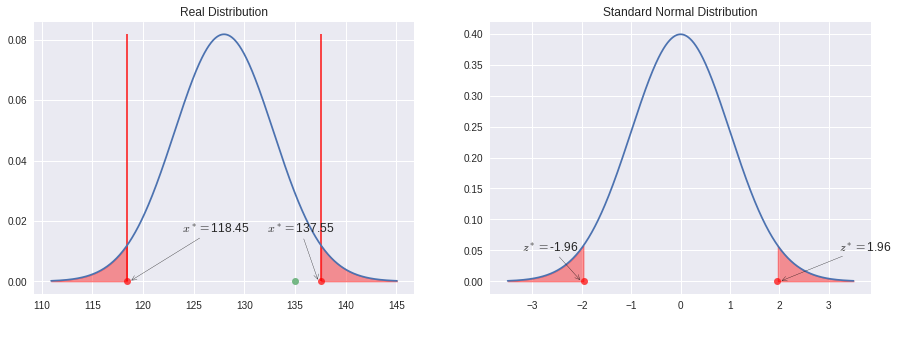

In [0]:
draw2Normal(xbar=135, mu0=128, s=39, n=64, alpha=0.05, tails="2")

From the picture above, we know that $x^*_l = 118.45$ and $x^*_u = 137.55$. How do we obtain these two values?

- Find $z^*$ defining the rejection region: For $\alpha=0.05$ and a two tail test, we find $z^* = 1.96$, using `ss.norm.ppf(1-alpha/2)`
- Find $x^*_l = \mu_0 - z^* \times SE = 118.45$ and $x^*_u = \mu_0 + z^* \times SE=137.55$, with $SE = \frac{39}{\sqrt{64}} = 4.875$

**Q3**: For this problem, you can use the simulator presented in the notebook `ht.ipnb`, under "Sample Size and Power."

Let us remember that the type 2 error ($\beta$) is the probability of _failing to reject_ $H_0$ when $H_0$ is indeed false (i.e., the real mean is $\mu = 135$). We approach the problem in two steps: 

1. **Assume $H_0$ is true, i.e., $\mu = \mu_0 = 128$.** 
Let us find the cutoff values, i.e., values for which we would reject the null hypothesis (using $\mu_0=128$). These are the values $x^*_l = 118.45$ and $x^*_u = 137.55$. We know that as  long as the observed $\bar{x}$ is below $x^*_l$ or above $x^*_u$, we will reject the null hypothesis.
2. **Assume $H_a$ is true, i.e., $\mu = \mu_a = 135$.** 
Let us compute the probability of obtaining value below $x^*_l$ or above $x^*_u$ assuming that the true mean is $\mu_a=135$. In other words, assuming that $H_0$ is false, what is the probability that we actually reject the null? This is the <font color="slateblue">power of the test</font>, i.e., $1-\beta$. We now compute the z scores of each $x^*$ value and the corresponding probabilities:
>- $z^*_l = \frac{118.4-135}{4.87} = -3.41 \to p(z < -3.41) = 0.0003$ (use `ss.norm.cdf(-3.41)`)
>- $z^*_u = \frac{137.5-135}{4.87} = 0.51 \to p(z > 0.51) = 0.301$  (use `1-ss.norm.cdf(0.51)`)

>Summing up the two probabilities, we obtain Power = $1-\beta = 0.0003 +  0.301$. Consequently, the probability of a Type 2 error would then be $1-0.3013 = 0.6987$.



## <font color="slateblue">Advanced : Power and Sample Size with StatsModels</font>

Remember that these functions use the $t$ distribution, not the normal distribution. Therefore, results will be slightly different.

In [205]:
from statsmodels.stats.power import TTestPower
analysis = TTestPower()
powerTest = analysis.power(effect_size=(135-128)/39, nobs=64, alpha=0.05, alternative='two-sided')
print("Power Test = {0:6.3f}".format(powerTest))

Power Test =  0.293


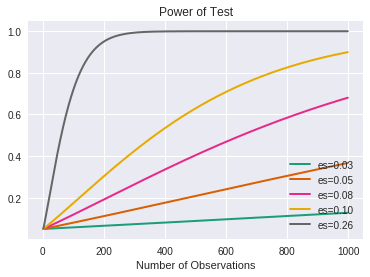

In [209]:
analysis.plot_power(dep_var='nobs', nobs=np.arange(2,1000), effect_size=np.array([1/39,2/39,3/39,4/39,10/39]))
plt.show()

# <font color="slateblue">Browsing on the Mobile Device</font>  

A 2012 survey of  2,254 American adults indicates that 17% of cell phone owners do their browsing on their phone rather than a computer or other device.  
1. According to an online article, a report from a mobile research company indicates that 38 percent of Chinese mobile web users only access the internet through their cell phones. Conduct a hypothesis test to determine if these data provide strong evidence that the proportion of Americans who only use their cell phones to access the internet is different than the Chinese proportion of 38\%.  
2. Interpret the p-value in this context.  
3. Calculate a 95% confidence interval for the proportion of Americans who access the internet on their cell phones, and interpret the interval in this context. 


**Q1**:
\begin{equation*}
\begin{cases} 
H_0 : & p = 0.38 \\
H_a : & p \neq 0.38 
\end{cases}
\end{equation*}

Assumptions: Independence (random sample, $<10%$ of population) and the success-failure condition are satisfied. 
- Step 1: Assume $H_0$ is true, i.e., $p_0 = 0.38$
- Step 2: Sample statistics: 
>- $\hat{p} = 0.17$, $SE = \sqrt{\frac{p_0(1-p_0)}{n}}=0.01$
- Step 3: Test statistic and p-value:
>- $z = \frac{\hat{p}-p_0}{SE} = \frac{0.17-0.38}{0.01} = -20.54\to$ p-value $\approx 0$. 
- Step 4: Since the p-value is very small, we reject $H_0$. The data provide strong evidence that the proportion of Americans who only use their cell phones to access the internet is different than the Chinese proportion of 38\%, and the data indicate that the proportion is lower in the US.  

**Q2**: If in fact 38\% of Americans used their cell phones as a primary access point to the internet, the probability of obtaining a random sample of 2,254 Americans where 17\% or less or 59\% or more use their only their cell phones to access the internet would be approximately 0.  

**Q3**: (0.1545, 0.1855). We are 95% confident that approximately 15.5% to 18.6% of all Americans primarily use their cell phones to browse the internet.  See computation in the next chunk.

In [212]:
# computation CI of Q3 above
alpha = 0.05 
phat = 0.17
n = 2254
SE = np.sqrt(phat*(1-phat)/n)
zStar = ss.norm.ppf(1-alpha/2)
lower = phat - zStar*SE
upper = phat + zStar*SE

print("SE    = {0:5.3f}".format(SE))
print("lower = {0:5.3f}".format(lower))
print("upper = {0:5.3f}".format(upper))
print("We are {0:2.0f}% confident that the proportion of Americans using their \
phone to browse the net is between {1:5.3f} and {2:5.3f} months.".format((1-alpha)*100, lower,upper))

SE    = 0.008
lower = 0.154
upper = 0.186
We are 95% confident that the proportion of Americans using their phone to browse the net is between 0.154 and 0.186 months.


# <font color="slateblue">Taste Test</font>

Some people claim that they can tell the difference between a diet soda and a regular soda in the first sip. A researcher wanting to test this claim randomly sampled 80 such people. He then filled 80 plain white cups with soda, half diet and half regular through random assignment, and asked each person to take one sip from their cup and identify the soda as diet or regular. 53 participants correctly identified the soda.  

1. Do these data provide strong evidence that these people are able to detect the difference between diet and regular soda, in other words, are the results significantly better than just random guessing?  
2. Interpret the p-value in this context.


**Q1**:

\begin{equation*}
\begin{cases} 
H_0 : & p = 0.5 \\
H_a : & p > 0.5 
\end{cases}
\end{equation*}

Assumptions: Independence (random sample, $<10\%$ of population) and the success-failure condition are satisfied. 

For the full solution, see steps in the chunk of code below.

**Q2**:  If in fact people cannot tell the difference between diet and regular soda and they randomly guess, the probability of getting a random sample of 80 people where 53 or more identify a soda correctly would be 0.0018.


In [0]:
alpha = 0.05

# Step 1. Assume H0 is true
p0 = 0.5
print("S1. Assume H0 is true, i.e., p0 =",p0)

# Step 2. Sample statistics
x = 53 # successes
n = 80 # nr. of trials
phat = x/n
SE = np.sqrt(phat*(1-phat)/n)

print("S2. Sample Stats:")
print("\t phat = {0:5.3f}".format(phat))
print("\t SE   = {0:5.3f}".format(SE))


# Step 3: z and p-value
zStat = (phat-p0)/SE
pVal  = 1-ss.norm.cdf(zStat) # one-tail
print("S3. Test Stat and p-value:")
print("\t z         = {0:5.3f}".format(zStat))
print("\t p-value   = {0:5.3f}".format(pVal))

# Step 4: Conclusion
print("S4. Conclusion:")
if pVal < alpha:
  print("\t Since p-value ({0:5.3f}) is less than alpha ({1:5.2f}), we reject H0".format(pVal, alpha))
else:
  print("\t Since p-value ({0:5.3f}) is greater than alpha ({1:5.2f}), we fail to reject H0".format(pVal, alpha))


S1. Assume H0 is true, i.e., p0 = 0.5
S2. Sample Stats:
	 phat = 0.662
	 SE   = 0.053
S3. Test Stat and p-value:
	 z         = 3.074
	 p-value   = 0.001
S4. Conclusion:
	 Since p-value (0.001) is less than alpha ( 0.05), we reject H0


# <font color="slateblue">Working Backwards</font>

A 95% confidence interval for a population mean, $\mu$, is given as $[18.985, 21.015]$. This confidence interval is based on a simple random sample of 26 observations.  Calculate the sample mean and standard deviation. Assume that all conditions necessary for inference are satisfied. Use the $t$-distribution in any calculations.


We know that the CI is computed as:
$$ \bar{x} \pm t^*\times SE$$
We also know that $df = n-1 = 25$, and $\alpha=0.05$. In addition, we know that $\bar{x}$ is the middle point of the interval. Thus, we derive:

In [0]:
xbar  = 18.985 + (21.015-18.985)/2 
print("xbar =", np.round(xbar,3))


xbar = 20.0
t*   =  2.06


Now, we also know that the product $t^*\times SE$ is the margin of error ME, which is half the width of the interval. Thus, we get:

In [0]:
ME = (21.015-18.985)/2
print("ME = ", np.round(ME,3))

ME =  1.015


Finally, we can get the value of $t^*$ using the inverse of the t distribution with df = n-1:

In [0]:
alpha = 0.05
n     = 26
tStar = ss.t.ppf(1-alpha/2,n-1)
print("t*   = ", np.round(tStar,3))

We then get the value of the SE as $SE=\frac{ME}{t^*}$ and, from there, the value of $\sigma$ as $\sigma = SE \times \sqrt{n}$:

In [0]:
SE = ME/tStar
sigma = SE * np.sqrt(n)
print("SE    =", np.round(SE,3))
print("sigma =", np.round(sigma,3))

SE    = 0.493
sigma = 2.513


# <font color="slateblue">Age at First Marriage</font>

The National Survey of Family Growth conducted by the Centers for Disease Control gathers information on family life, marriage and divorce, pregnancy, infertility, use of contraception, and men's and women's health. One of the variables collected on this survey is the age at first marriage. The file `age_at_mar.csv` contains the age at first marriage of 5,534 randomly sampled women between 2006 and 2010. 

1. Import the data, create a histogram, and compute some summary statistics.
2. Is there enough evidence to claim that the average age at first marriage for the population is less than 24 years? Use $\alpha=0.05$.
3. Estimate the average age at first marriage of women using a 95\% confidence interval, and interpret this interval in context. Discuss any relevant assumptions.
4. Repeat the exercise using `statsmodels`.


In [225]:
# Question 1
#============

df = pd.read_csv("age_at_mar.csv")
df.head()

,age
0,32
1,25
2,24
3,26
4,32


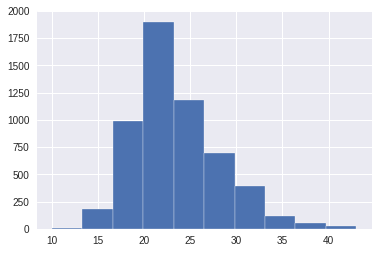

Summary Statistics ::
---------------------


count    5534.000000
mean       23.440188
std         4.721365
min        10.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        43.000000
Name: age, dtype: float64

In [226]:
df["age"].hist(edgecolor="white", bins=10)
plt.show()
msg = "Summary Statistics ::"
print(msg)
print("-"*len(msg))
df["age"].describe()

In [230]:
# Question 2
#============

alpha = 0.05

# Step 1. Assume H0 is true
mu0 = 24
print("S1. Assume H0 is true, i.e., mu0 =",mu0)

# Step 2. Sample statistics
xbar = np.mean(df['age']) 
n    = len(df['age'])
s    = np.std(df['age'])
SE   = s/np.sqrt(n)

print("S2. Sample Stats:")
print("\t xbar = {0:6.3f}".format(xbar))
print("\t SE   = {0:6.3f}".format(SE))


# Step 3: z and p-value
zStat = (xbar-mu0)/SE
pVal  = ss.norm.cdf(zStat) # one-tail
print("S3. Test Stat and p-value:")
print("\t z         = {0:6.3f}".format(zStat))
print("\t p-value   = {0:6.3f}".format(pVal))

# Step 4: Conclusion
print("S4. Conclusion:")
if pVal < alpha:
  print("\t Since p-value ({0:6.3f}) is less than alpha ({1:5.2f}), we reject H0".format(pVal, alpha))
else:
  print("\t Since p-value ({0:6.3f}) is greater than alpha ({1:5.2f}), we fail to reject H0".format(pVal, alpha))


S1. Assume H0 is true, i.e., mu0 = 24
S2. Sample Stats:
	 xbar = 23.440
	 SE   =  0.063
S3. Test Stat and p-value:
	 z         = -8.821
	 p-value   =  0.000
S4. Conclusion:
	 Since p-value ( 0.000) is less than alpha ( 0.05), we reject H0


In [228]:
# Question 3
#============

alpha = 0.05 
xbar  = np.mean(df['age'])
s     = np.std(df['age'])
n     = len(df['age'])
SE    = s/np.sqrt(n)
zStar = ss.norm.ppf(1-alpha/2)
lower = xbar - zStar*SE
upper = xbar + zStar*SE

print("SE    = {0:5.3f}".format(SE))
print("lower = {0:5.3f}".format(lower))
print("upper = {0:5.3f}".format(upper))
print("We are {0:2.0f}% confident that the average age is between {1:5.3f} and {2:5.3f} years.".format((1-alpha)*100, lower,upper))

SE    = 0.063
lower = 23.316
upper = 23.565
We are 95% confident that the average age is between 23.316 and 23.565 years.


In [229]:
# Question 4: Use built-in functions to carry out HT and CI
#==========================================================
res=smw.DescrStatsW(df['age'])
lower, upper = res.zconfint_mean(alpha=0.05)  # get CI
zStat, pVal = res.ztest_mean(value=mu0, alternative='two-sided') # and HT

# printing information
msg = "Results of HT and CI with statsmodels ::"
print(msg)
print("-"*len(msg))
print("xbar  \t= {0:6.2f}".format(res.mean,3))
print("s  \t= {0:6.2f}".format(res.std))
print("n  \t= {0:6.2f}".format(res.nobs))
print("SE  \t= {0:6.2f}".format(res.std_mean))

# lower and upper of CI
print("lower  \t= {0:6.2f}".format(lower))
print("upper  \t= {0:6.2f}".format(upper))

# test stat and p-value of HT
print("z\t= {0:6.3f}".format(zStat))
print("p-value\t= {0:6.3f}".format(pVal))

Results of HT and CI with statsmodels ::
----------------------------------------
xbar  	=  23.44
s  	=   4.72
n  	= 5534.00
SE  	=   0.06
lower  	=  23.32
upper  	=  23.56
z	= -8.821
p-value	=  0.000
